In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Rossman/train.csv')
store = pd.read_csv('/content/drive/MyDrive/Rossman/store.csv')
test = pd.read_csv('/content/drive/MyDrive/Rossman/test.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(train.shape)
print(test.shape)
print(store.shape)

(1017209, 9)
(41088, 8)
(1115, 10)


In [5]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [8]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [9]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
#Finding categorical variables
categorical = [var for var in train.columns if train[var].dtype =='O']

print('There are {} categorical variables in training set.\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 2 categorical variables in training set.

The categorical variables are : ['Date', 'StateHoliday']


In [11]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [12]:
train.describe(include='object')

,Date,StateHoliday
count,1017209,1017209
unique,942,5
top,2013-12-29,0
freq,1115,855087


In [13]:
train.describe()[['Sales','Customers']]

,Sales,Customers
count,1.017209e+06,1.017209e+06
mean,5.773819e+03,6.331459e+02
std,3.849926e+03,4.644117e+02
min,0.000000e+00,0.000000e+00
25%,3.727000e+03,4.050000e+02
50%,5.744000e+03,6.090000e+02
75%,7.856000e+03,8.370000e+02
max,4.155100e+04,7.388000e+03


In [14]:
train.Store.nunique()

1115

**Missing Values**

In [15]:
print(train.isna().sum())
print('-'*20)
print(store.isna().sum())
print('-'*20)
print(test.isna().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
--------------------
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
--------------------
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


**Exploring a particular store (Store1)**

In [16]:
store1 = train[train['Store']==1]
store1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1


In [17]:
store1['Date'] = pd.to_datetime(store1['Date'])
print(min(store1['Date']))
print(max(store1['Date']))
store1['Year'] = store1['Date'].dt.year
store1['Month'] = store1['Date'].dt.month

2013-01-01 00:00:00
2015-07-31 00:00:00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

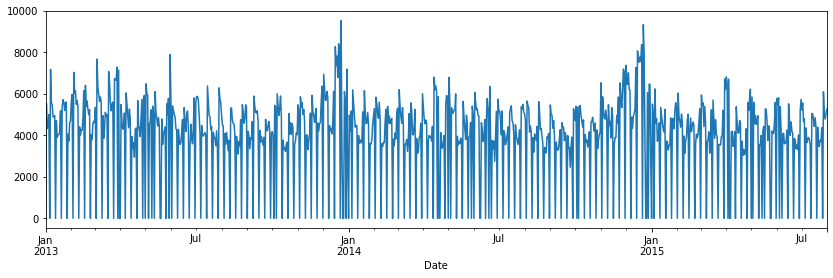

In [18]:
store1.resample('1D',on='Date')['Sales'].sum().plot.line(figsize=(14,4))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


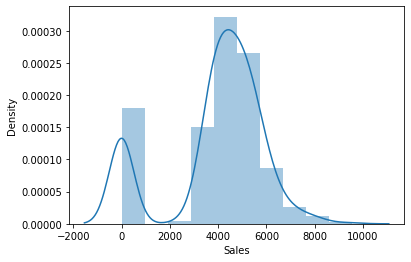

In [19]:
import seaborn as sns
sns.distplot(store1.Sales , bins=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


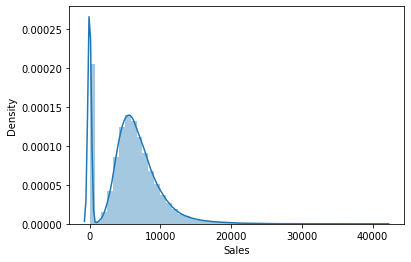

In [20]:
sns.distplot(train.Sales)
plt.show()

**Treating Missing Values**

In [21]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [22]:
store[store['Store']==1].T

,0
Store,1
StoreType,c
Assortment,a
CompetitionDistance,1270
CompetitionOpenSinceMonth,9
CompetitionOpenSinceYear,2008
Promo2,0
Promo2SinceWeek,NaN
Promo2SinceYear,NaN
PromoInterval,NaN


In [23]:
store[~(store['Promo2']==0)].iloc[0]

Store                                      2
StoreType                                  a
Assortment                                 a
CompetitionDistance                      570
CompetitionOpenSinceMonth                 11
CompetitionOpenSinceYear                2007
Promo2                                     1
Promo2SinceWeek                           13
Promo2SinceYear                         2010
PromoInterval                Jan,Apr,Jul,Oct
Name: 1, dtype: object

In [24]:
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(store['Promo2SinceYear'].mode().iloc[0])
store['PromoInterval'] = store['PromoInterval'].fillna(store['PromoInterval'].mode().iloc[0])

store['CompetitionDistance'] = store['CompetitionDistance'].fillna(store['CompetitionDistance'].max())
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode().iloc[0])
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode().iloc[0])

In [25]:
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**Merging Data**

In [26]:
df = train.merge(store , on='Store' , how='left')
print(train.shape)
print(store.shape)
print(df.shape)

(1017209, 9)
(1115, 10)
(1017209, 18)


In [27]:
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"


In [28]:
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**Encoding**

In [29]:
df['Date'] = pd.to_datetime(df['Date'])

In [30]:

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [31]:
df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Day                                   int64
Month                                 int64
Year                                  int64
dtype: object

**Categorical Columns**

In [32]:
cat_cols = df.select_dtypes(include=['object']).columns

for i in cat_cols:
    print(i)
    print(df[i].value_counts())
    print('-'*20)

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
--------------------
StoreType
a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64
--------------------
Assortment
a    537445
c    471470
b      8294
Name: Assortment, dtype: int64
--------------------
PromoInterval
Jan,Apr,Jul,Oct     801153
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64
--------------------


In [33]:
df['StateHoliday'] = df['StateHoliday'].map({'0':0 , 0:0 , 'a':1 , 'b':2 , 'c':3})
df['StateHoliday'] = df['StateHoliday'].astype(int)
df['StoreType'] = df['StoreType'].map({'a':1 , 'b':2 , 'c':3 , 'd':4})
df['StoreType'] = df['StoreType'].astype(int)
df['Assortment'] = df['Assortment'].map({'a':1 , 'b':2 , 'c':3})
df['Assortment'] = df['Assortment'].astype(int)

In [34]:
df['PromoInterval'] = df['PromoInterval'].map({'Jan,Apr,Jul,Oct':1 , 'Feb,May,Aug,Nov':2 , 'Mar,Jun,Sept,Dec':3})
df['PromoInterval'] = df['PromoInterval'].astype(int)

In [35]:
 df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                         int64
Day                                   int64
Month                                 int64
Year                                  int64
dtype: object

**Train & Validate Split**

In [36]:
X = df.drop(['Sales','Date','Customers'],1)
#Transform Target Variable
y = np.log(df['Sales']+1)

from sklearn.model_selection import train_test_split
X_train , X_val , y_train , y_val = train_test_split(X , y , test_size=0.30 , random_state = 1 )

X_train.shape , X_val.shape , y_train.shape , y_val.shape

((712046, 18), (305163, 18), (712046,), (305163,))

**Decision Tree**

In [37]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=11)
dt.fit(X_train , y_train)
y_pred_dt = dt.predict(X_val)

In [38]:
y_pred_dt = np.exp(y_pred_dt)-1
y_val = np.exp(y_val)-1

In [39]:
from sklearn.metrics import r2_score , mean_squared_error

print(r2_score(y_val , y_pred_dt))
print(np.sqrt(mean_squared_error(y_val , y_pred_dt)))

0.7049905322821208
2093.8958310456374


**RMSPE - Root Mean Square Percentage Error**

In [40]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(y, yhat):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

In [41]:
rmspe(y_val,y_pred_dt)

0.34345382708135663

**Process Test Data**

In [42]:
test.shape

(41088, 8)

In [42]:
test.head()

In [43]:
test_cust = train.groupby(['Store'])[['Customers']].mean().reset_index().astype(int)
test_1 = test.merge(test_cust , on='Store' , how='left')
test_1.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Customers
0,1,1,4,2015-09-17,1.0,1,0,0,467
1,2,3,4,2015-09-17,1.0,1,0,0,620
2,3,7,4,2015-09-17,1.0,1,0,0,791
3,4,8,4,2015-09-17,1.0,1,0,0,547
4,5,9,4,2015-09-17,1.0,1,0,0,479


In [44]:
test_m = test_1.merge(store , on='Store' , how='left')

In [45]:
test_m.shape

(41088, 18)

In [46]:
test_m['Open'].fillna(1,inplace=True)

test_m['Date'] = pd.to_datetime(test_m['Date'])

test_m['Day'] = test_m['Date'].dt.day
test_m['Month'] = test_m['Date'].dt.month
test_m['Year'] = test_m['Date'].dt.year

test_m.drop('Date',1,inplace=True)

In [47]:
cat_cols = test_m.select_dtypes(include=['object']).columns

for i in cat_cols:
    print(i)
    print(test_m[i].value_counts())
    print('-'*20)

StateHoliday
0    40908
a      180
Name: StateHoliday, dtype: int64
--------------------
StoreType
a    22128
d    14112
c     4272
b      576
Name: StoreType, dtype: int64
--------------------
Assortment
c    20352
a    20304
b      432
Name: Assortment, dtype: int64
--------------------
PromoInterval
Jan,Apr,Jul,Oct     31008
Feb,May,Aug,Nov      5712
Mar,Jun,Sept,Dec     4368
Name: PromoInterval, dtype: int64
--------------------


In [48]:
test_m['StateHoliday'] = test_m['StateHoliday'].map({'0':0 , 'a':1})
test_m['StateHoliday'] = test_m['StateHoliday'].astype(int)

test_m['StoreType'] = test_m['StoreType'].map({'a':1 , 'b':2 , 'c':3 , 'd':4})
test_m['StoreType'] = test_m['StoreType'].astype(int)

test_m['Assortment'] = test_m['Assortment'].map({'a':1 , 'b':2 , 'c':3})
test_m['Assortment'] = test_m['Assortment'].astype(int)

test_m['PromoInterval'] = test_m['PromoInterval'].map({'Jan,Apr,Jul,Oct':1 , 'Feb,May,Aug,Nov':2 , 'Mar,Jun,Sept,Dec':3})
test_m['PromoInterval'] = test_m['PromoInterval'].astype(int)

test_m.dtypes

Id                             int64
Store                          int64
DayOfWeek                      int64
Open                         float64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
Customers                      int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int64
Day                            int64
Month                          int64
Year                           int64
dtype: object

In [49]:
X_train.dtypes

Store                          int64
DayOfWeek                      int64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int64
Day                            int64
Month                          int64
Year                           int64
dtype: object

In [50]:
test_m.isna().sum()

Id                           0
Store                        0
DayOfWeek                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Customers                    0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Day                          0
Month                        0
Year                         0
dtype: int64

**Prediction**

In [51]:
test_pred = dt.predict(test_m[X_train.columns])
test_pred_inv = np.exp(test_pred)-1
test_pred_inv

array([ 7232.9757879 ,  7621.00878763,  7547.24199451, ...,
        5816.10706042, 31445.        ,  4996.38809804])